<a href="https://colab.research.google.com/github/itamarashofinia/PC_SMT6_2023/blob/main/PC_Modul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Mounted at /content/drive


# **Transformasi Linear Brightness**

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 30


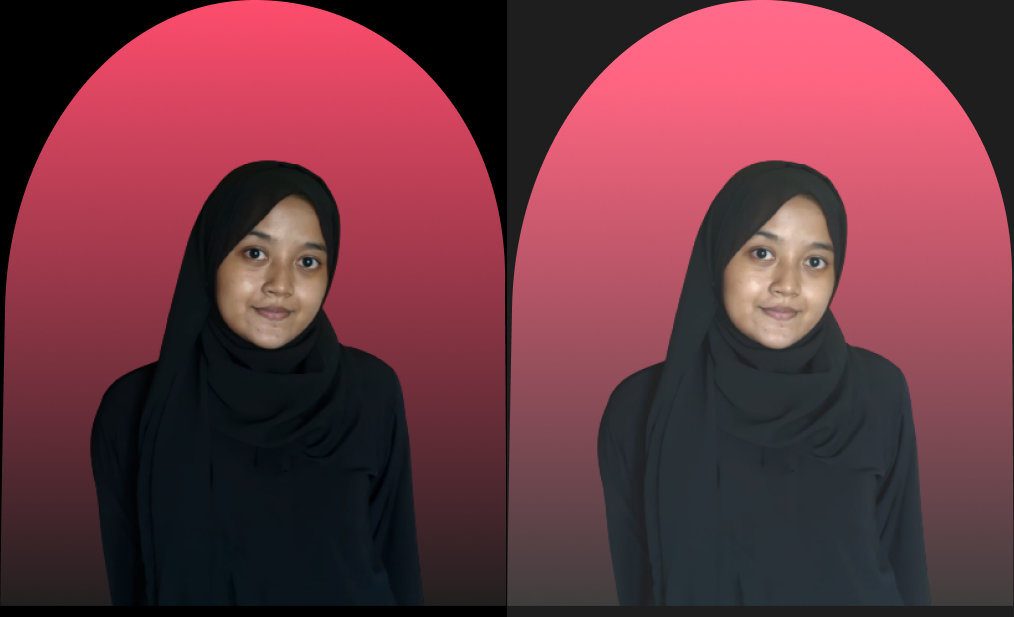

In [8]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PC/ShofinnnCantik.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#Cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

# **Tugas Praktikum**

**1. Implementasikan transformasi contrast pada Google colab menggunakan formula yang terdapat pada bagian ulasan teori, sehingga menghasilkan keluaran seperti berikut**

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 30
Masukkan nilai kontras: 3.0


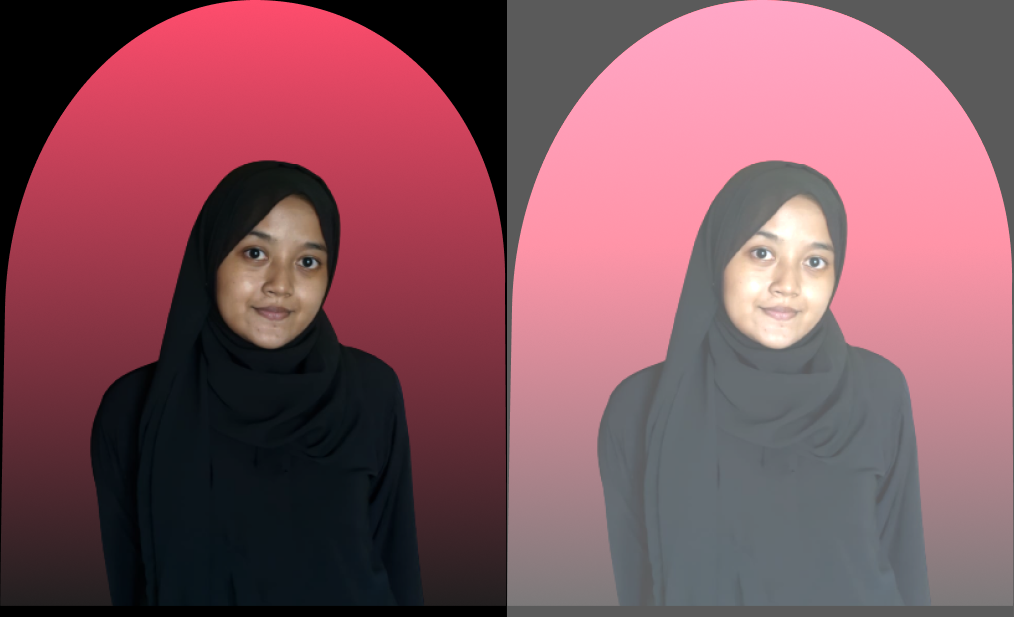

In [10]:
# Implementasi Transformasi Contrast
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = float(input('Masukkan nilai kecerahan: '))
  contrast = float(input('Masukkan nilai kontras: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PC/ShofinnnCantik.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness * contrast, 0, 255)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

**2. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut**

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 30


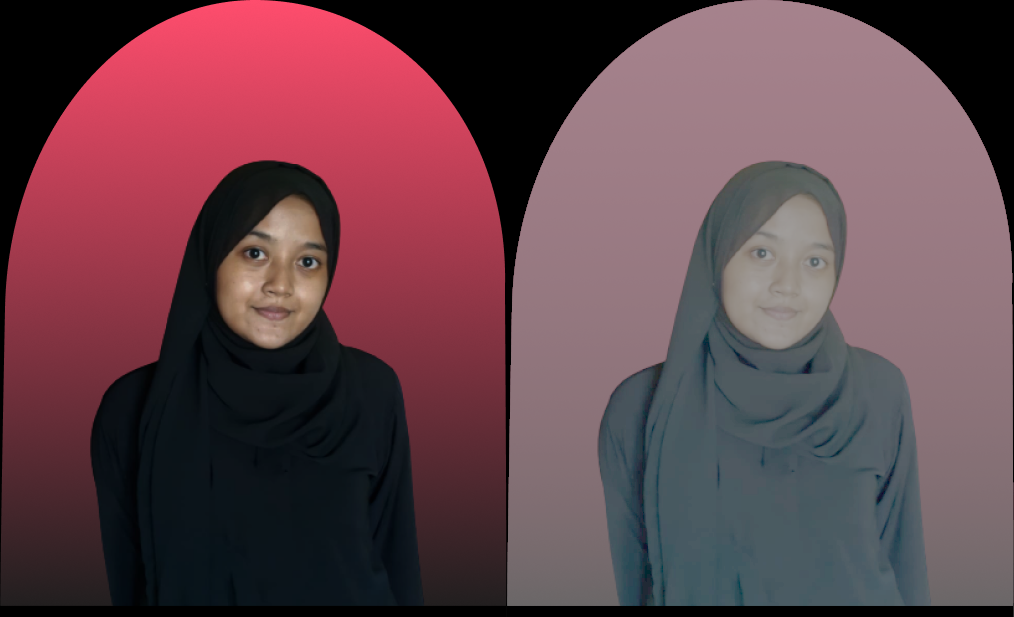

In [14]:
# Logarithmic brightness
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PC/ShofinnnCantik.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1+original[y,x,c])),0,255)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

**3. Implementasikan transformasi grayscale menggunakan metode averaging, lightness dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut**

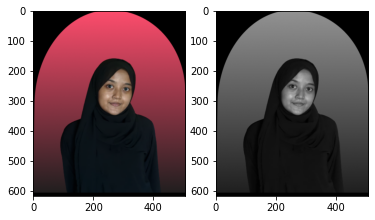

In [15]:
# Averaging
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/PC/ShofinnnCantik.tiff')
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
GrayAvg = cv.cvtColor(img, cv.COLOR_BGR2RGB)
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]
GrayAvg[:] = np.sum(GrayAvg, axis=-1, keepdims=1)/3

f, axarr = plt.subplots(1,2)
axarr[0].imshow(image)
axarr[1].imshow(GrayAvg)


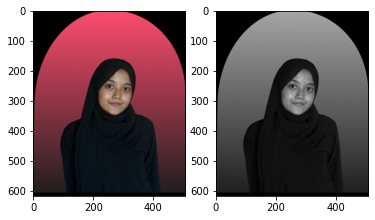

In [16]:
# Lightness
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/PC/ShofinnnCantik.tiff')
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
GrayLig = cv.cvtColor(img, cv.COLOR_BGR2RGB)
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]
GrayLig[:] = (np.max(GrayLig, axis=-1, keepdims=1))/2 + (np.min(GrayLig, axis=-1, keepdims=1))/2

f, axarr = plt.subplots(1,2)
axarr[0].imshow(image)
axarr[1].imshow(GrayLig, cmap='gray')

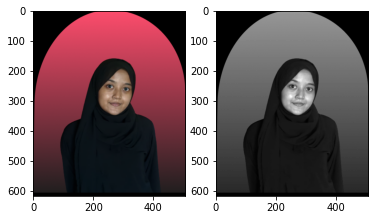

In [17]:
# Luminance
img = cv.imread('/content/drive/MyDrive/PC/ShofinnnCantik.tiff')
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]
lumi = (0.21 * R) + (0.72 * G) + (0.07 * B)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(image)
axarr[1].imshow(lumi, cmap='gray')

**4. Tampilkanlah warna tertentu pada citra dan ubah warna lain menjadi grayscale. Misal, tampilkan warna merah pada citra masukan dan ubag bagian lain yang tidak berwarna merah menjadi grayscale**

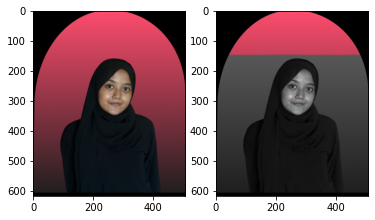

In [18]:
# Tugas 4

r = cv.imread('/content/drive/MyDrive/PC/ShofinnnCantik.tiff')
finimg = cv.cvtColor(r, cv.COLOR_BGR2RGB)
ret, mask = cv.threshold(r[:, :,2], 200, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(r)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask

red = cv.bitwise_and(finimg, mask3)
gray = cv.cvtColor(finimg, cv.COLOR_BGR2GRAY)
finimg  = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(finimg, 255 - mask3)

ed = gray + red

f, axarr = plt.subplots(1,2)
plt.imshow(ed)
axarr[0].imshow(image)
axarr[1].imshow(ed, cmap='gray')
